In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
# Let's load the loan dataset, with the 
# indicated columns below

cols = [
    'member_id',
    'funded_amnt',
    'term',
    'addr_state',
    'revol_bal',
    'last_pymnt_d'
    ]

data = pd.read_csv('loan.csv', usecols = cols)

# let's visualise the first 5 rows
data.head()

,member_id,funded_amnt,term,addr_state,revol_bal,last_pymnt_d
0,1296599,5000.0,36 months,AZ,13648.0,Jan-2015
1,1314167,2500.0,60 months,GA,1687.0,Apr-2013
2,1313524,2400.0,36 months,IL,2956.0,Jun-2014
3,1277178,10000.0,36 months,CA,5598.0,Jan-2015
4,1311748,3000.0,60 months,OR,27783.0,Jan-2016


In [3]:
# let's inspect the type of the variables

for col in data.columns:
    print(col, data[col].dtypes)

member_id int64
funded_amnt float64
term object
addr_state object
revol_bal float64
last_pymnt_d object


### member_id

In this case, member id is the example in which a number is given to mask the identity of the borrower, rather than to mean anything in particular. Therefore, even though this is a number, in reality, we can treat it as a categorical variable. Each number represents a borrower.

How can we know this? 

A bit of domain knowledge on how databases are administered, which you may or may not have. And also, we can inspect the number of unique values the variable takes. If there are as many unique values as rows (i.e., borrowers), we can begin to suspect that the variable is actually 'labelling' something, and therefore it is in essence a categorical variable.

In [4]:
# let's have a look at how many labels are there in member_id

print('Number of unique member values: {}'.format((len(data.member_id.unique()))))
print('Number of borrowers (rows): {}'.format(data.shape[0]))

Number of unique member values: 887379
Number of borrowers (rows): 887379


### funded_amnt

By inspecting the pandas type of the variable, looking at the actual values of the variable and plotting the histogram, we can safely conclude that this variable is a numerical continuous variable.

In principle, the amount funded by Lending Club to the borrower, could take any value.

In [5]:
# we can see that the type is float, therefore it is a numerical variable

data['funded_amnt'].dtypes

dtype('float64')

In [6]:
# we can see that the variable takes multiple different values

data.funded_amnt.unique()

array([  5000.,   2500.,   2400., ...,  32925.,  32825.,  32575.])

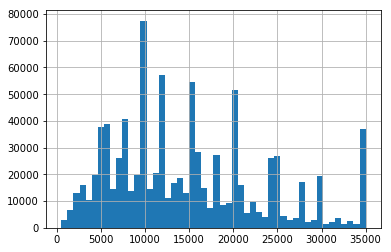

In [7]:
# in the histogram, we see that the variable is continuous,
# it can take any value in principle, and the intervals of 
# the histogram are not broken

data.funded_amnt.hist(bins=50)

### term

By looking at the values of the variable, we can conclude that this is a categorical variable. However, the real meaning of the variable is to indicate how long it will take the borrower to repay their loan. And therefore, it could be transformed into a numerical variable, as we will see in future lectures.

Both answers are correct.

In addition, we can argue that **loan term is a discrete variable**, because it can only take values of 12, 24, 36, 60 and multiples of 12 (in practice this is what happens, finance companies establish arrangements for a finite amount of years with the borrowers).

In this case, as Lending Club seems only to provide loans for 36 or 60 months, according to Lending Club definition of the variable 'term', we could also say that the variable is binary.

All of the above answers are correct. The important thing is to understand what these definitions mean.

In [8]:
#  by looking at the values, we can see that it is a string coded variable, therefore at first sight it is categorical.
# And this would be a fair conclusion

data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [9]:
# however, the real meaning of this variable is, how many months were arranged with the borrower for the repayment of the loan.
# and we can see that Lending Club arranges long terms of 2 lenghts, either 36 months (3 years) or 60 months (5 years)

# therefore, we could re-code the variable into a numerical one by extracting the number out of the variable like this:

data.loc[:, 'term_num'] = data['term'].str.extract('(\d+)')
data[['term', 'term_num']].head(10)

C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,term,term_num
0,36 months,36
1,60 months,60
2,36 months,36
3,36 months,36
4,60 months,60
5,36 months,36
6,60 months,60
7,36 months,36
8,60 months,60
9,60 months,60


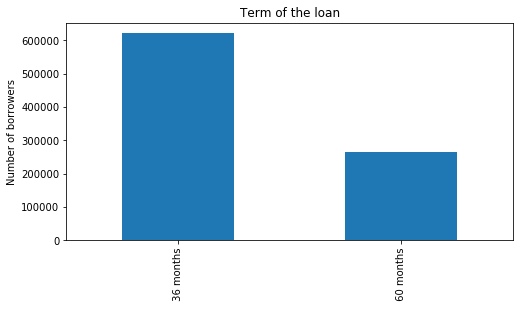

In [10]:
fig = data['term'].value_counts().plot.bar(figsize=(8,4))
fig.set_title('Term of the loan')
fig.set_ylabel('Number of borrowers')

### addr_state

A categorical variable, each part indicating the area where the borrower that applies for the loan, lives in.

In [11]:
data.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

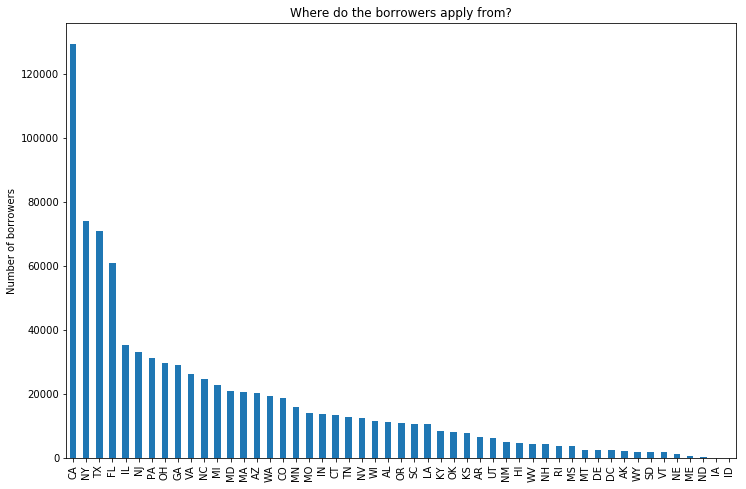

In [12]:
fig = data['addr_state'].value_counts().plot.bar(figsize=(12,8))
fig.set_title('Where do the borrowers apply from?')
fig.set_ylabel('Number of borrowers')

### last_pymnt_d

In [13]:
# now let's parse the dates, currently coded as strings, into datetime format
# this will allow us to make some nice analysis afterwards

data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)
data[['last_pymnt_d','last_pymnt_dt']].head()

,last_pymnt_d,last_pymnt_dt
0,Jan-2015,2015-01-01
1,Apr-2013,2013-04-01
2,Jun-2014,2014-06-01
3,Jan-2015,2015-01-01
4,Jan-2016,2016-01-01


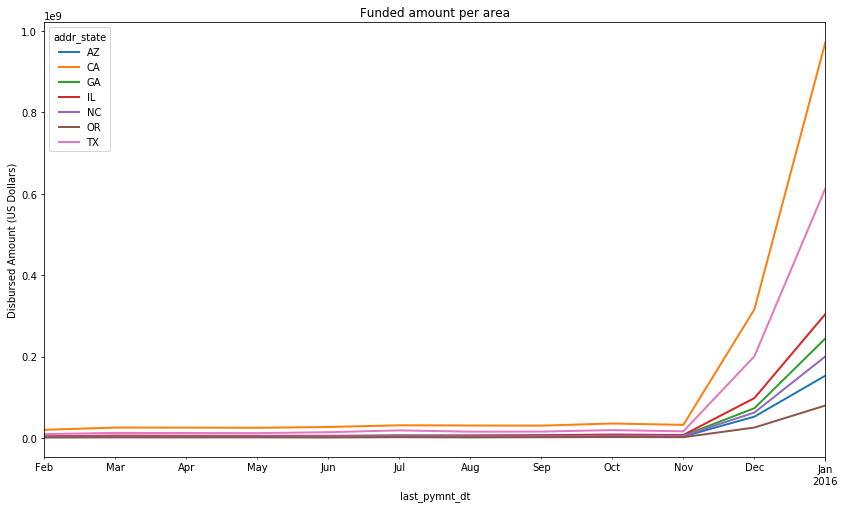

In [14]:
# let's see how much money Lending Club has disbursed (aka lent)
# over the years to the different risk markets(grade variable)

temp = data[(data.addr_state.isin(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX']))&(data.last_pymnt_dt > '2015-01-01')]

fig = temp.groupby(['last_pymnt_dt','addr_state'])['funded_amnt'].sum().unstack().plot(figsize = (14,8), linewidth=2)
fig.set_title('Funded amount per area')
fig.set_ylabel('Disbursed Amount (US Dollars)')

### Well Done!!